# Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

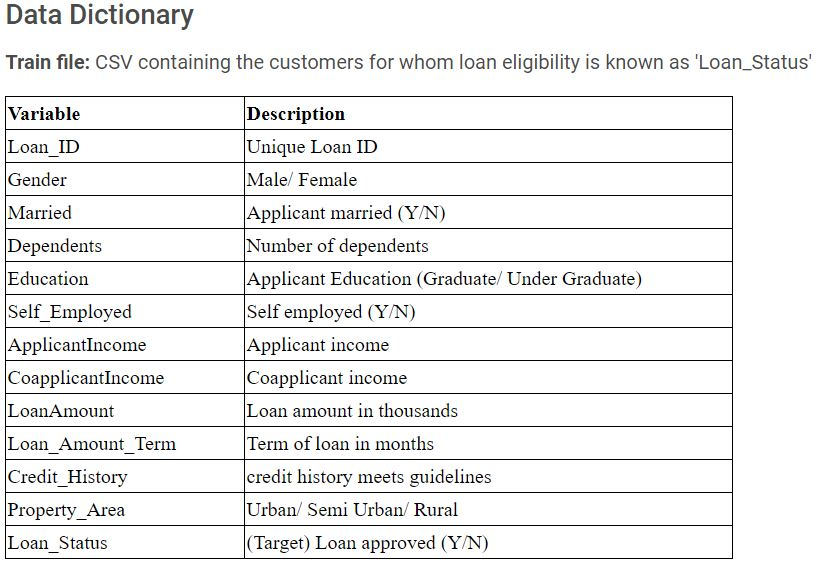

In [37]:
from IPython.display import Image 

Image("Capture1.JPG", width = 400, height = 100)

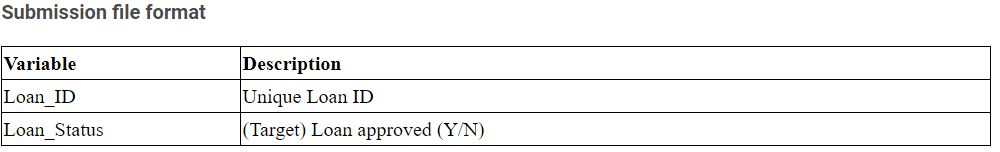

In [39]:
Image("Capture2.JPG", width = 400, height = 100)


# Importing all the libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter
import warnings
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler

warnings.filterwarnings("ignore")


df = pd.read_csv('train_ctrUa4K.csv')
df1 = pd.read_csv('test_lAUu6dG.csv')

In [5]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
None


# Exploratory data analysis

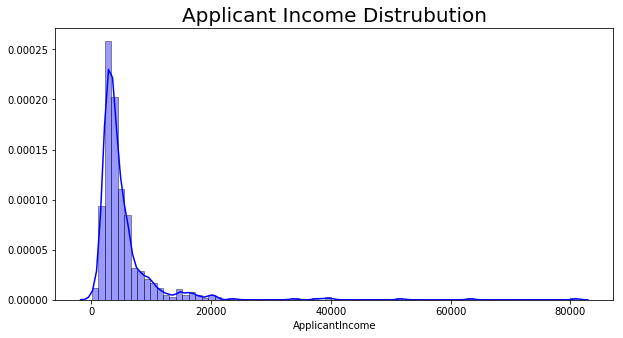

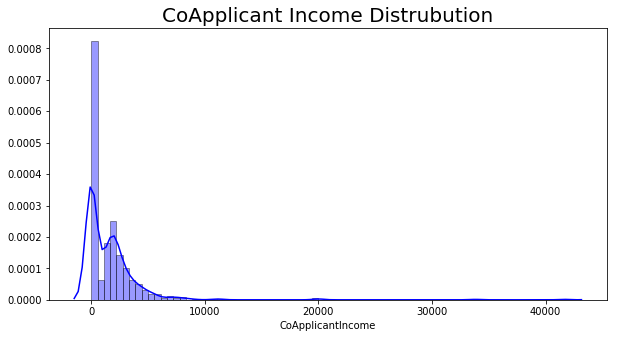

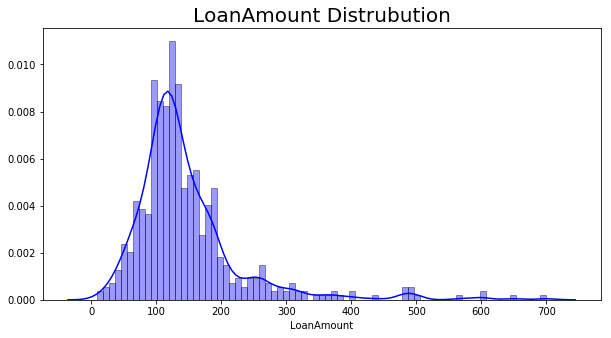

In [7]:
plt.figure(figsize=(10, 5))

sns.distplot(df['ApplicantIncome'].dropna(), hist=True, kde=True, 
             bins=int(75), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.xlabel('ApplicantIncome')
plt.title('Applicant Income Distrubution', Size = 20)
plt.show()


plt.figure(figsize=(10, 5))
sns.distplot(df['CoapplicantIncome'].dropna(), hist=True, kde=True, 
             bins=int(75), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.xlabel('CoApplicantIncome')
plt.title('CoApplicant Income Distrubution', Size = 20)
plt.show()


plt.figure(figsize=(10, 5))
sns.distplot(df['LoanAmount'].dropna(), hist=True, kde=True, 
             bins=int(75), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.xlabel('LoanAmount')
plt.title('LoanAmount Distrubution', Size = 20)
plt.show()




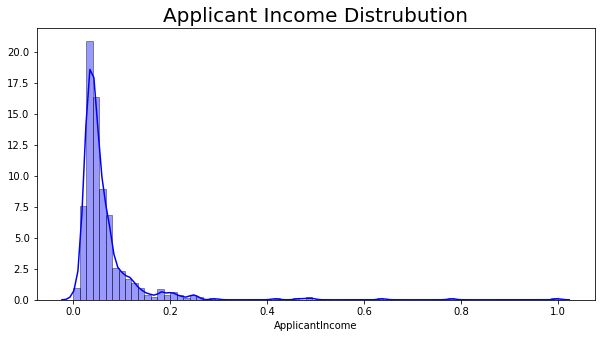

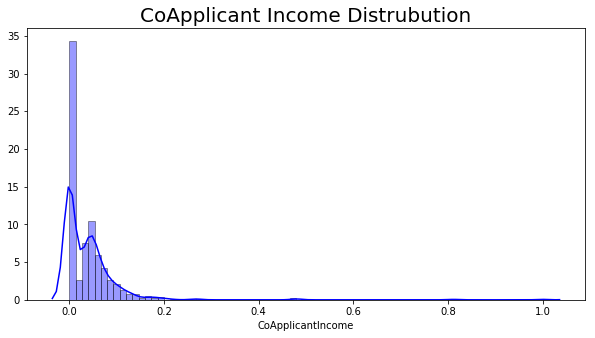

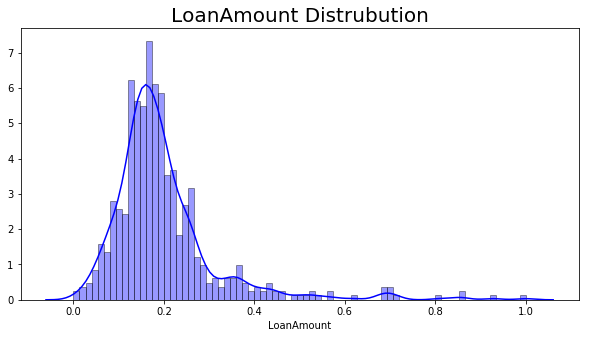

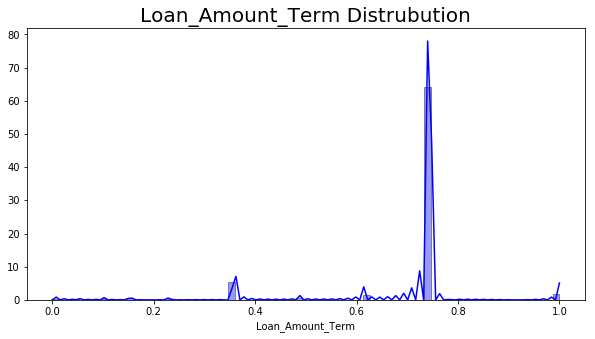

In [8]:

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df1['LoanAmount'] = df1['LoanAmount'].fillna(df1['LoanAmount'].mean())

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df1['Loan_Amount_Term'] = df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0])

scaler = MinMaxScaler()

features = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount","Loan_Amount_Term"]
df[features] = scaler.fit_transform(df[features])

plt.figure(figsize=(10, 5))

sns.distplot(df['ApplicantIncome'].dropna(), hist=True, kde=True, 
             bins=int(75), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.xlabel('ApplicantIncome')
plt.title('Applicant Income Distrubution', Size = 20)
plt.show()


plt.figure(figsize=(10, 5))
sns.distplot(df['CoapplicantIncome'].dropna(), hist=True, kde=True, 
             bins=int(75), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.xlabel('CoApplicantIncome')
plt.title('CoApplicant Income Distrubution', Size = 20)
plt.show()


plt.figure(figsize=(10, 5))
sns.distplot(df['LoanAmount'].dropna(), hist=True, kde=True, 
             bins=int(75), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.xlabel('LoanAmount')
plt.title('LoanAmount Distrubution', Size = 20)
plt.show()


plt.figure(figsize=(10, 5))
sns.distplot(df['Loan_Amount_Term'].dropna(), hist=True, kde=True, 
             bins=int(75), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.xlabel('Loan_Amount_Term')
plt.title('Loan_Amount_Term Distrubution', Size = 20)
plt.show()


#sns.pairplot(df[df[df.columns].isnull()!=True])

In [9]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.822888,0.825444
std,4910.685399,2334.232099,60.946040,64.658402,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# Hypothesis testing for feature selection (Chi-square test)

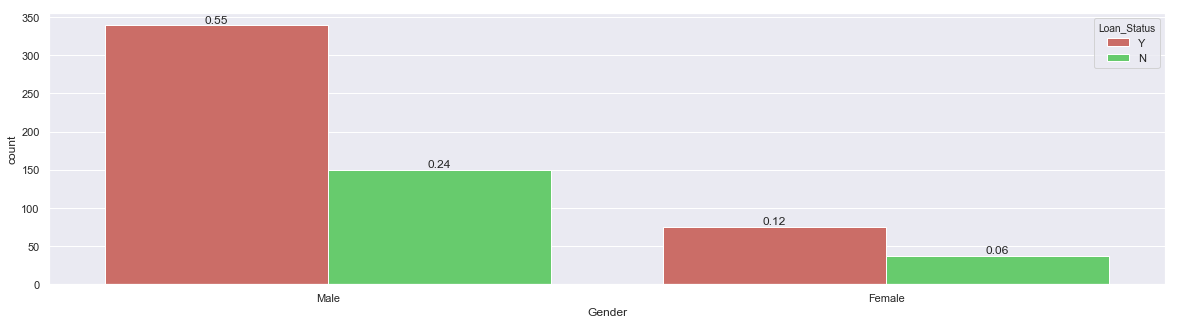

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

def countplot_function(X,Y):

    sns.set(style = 'darkgrid')
    sns.set_palette('hls', 3)
    fig, ax = plt.subplots(figsize = (20,5))
    ax = sns.countplot(x = X, hue = Y)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2,height +3, '{:1.2f}'.format(height/df.shape[0]),ha = "center")
    plt.show()

    
countplot_function(df['Gender'],df['Loan_Status'])
    
    

In [11]:
crosstab_table = pd.crosstab(df['Gender'],df['Loan_Status'], margins = True)
crosstab_table

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


In [12]:
def check_categorical_dependency(crosstab_table, confidence_interval, feature):
    stat, p, dof, expected = stats.chi2_contingency(crosstab_table)
    print ("Chi-Square Statistic value for {1} = {0}".format(stat,feature))
    print ("P - Value for {1} = {0}".format(p, feature))
    alpha = 1.0 - confidence_interval
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    return expected

exp_table = check_categorical_dependency(crosstab_table, 0.95, 'Gender')


Chi-Square Statistic value for Gender = 0.23697508750826923
P - Value for Gender = 0.9935109668689276
Independent (fail to reject H0)


In [13]:
categorical_features = ['Gender','Married','Education','Self_Employed','Property_Area']

for feature in categorical_features:
    crosstab_table = pd.crosstab(df[feature],df['Loan_Status'], margins = True)
    exp_table = check_categorical_dependency(crosstab_table, 0.95, feature)
    print('-'*50)
    


Chi-Square Statistic value for Gender = 0.23697508750826923
P - Value for Gender = 0.9935109668689276
Independent (fail to reject H0)
--------------------------------------------------
Chi-Square Statistic value for Married = 4.870255560503662
P - Value for Married = 0.3008710065428864
Independent (fail to reject H0)
--------------------------------------------------
Chi-Square Statistic value for Education = 4.5288927351787684
P - Value for Education = 0.3391352834234793
Independent (fail to reject H0)
--------------------------------------------------
Chi-Square Statistic value for Self_Employed = 0.0030864285864601513
P - Value for Self_Employed = 0.9999988104691742
Independent (fail to reject H0)
--------------------------------------------------
Chi-Square Statistic value for Property_Area = 12.297623130485677
P - Value for Property_Area = 0.055649170558480544
Independent (fail to reject H0)
--------------------------------------------------


### From above hypothesis testing it can be concluded that columns like "Gender" and "Self_Employed" do not contribute in predicting the target variable, hence dropped 

In [14]:
df_train = df.drop(['Gender','Self_Employed'],axis='columns')
df_test = df1.drop(['Gender','Self_Employed'],axis='columns')

df_train['Dependents'].unique()


array(['0', '1', '2', '3+', nan], dtype=object)

# Handling missing Values

In [15]:
df_train['Dependents'] = df_train['Dependents'].str.replace("+","")
df_test['Dependents'] = df_test['Dependents'].str.replace("+","")

df_train['Dependents'] = df_train['Dependents'].fillna('0')
df_test['Dependents'] = df_test['Dependents'].fillna('0')

df_train['Dependents'] = df_train['Dependents'].astype(int)
df_test['Dependents'] = df_test['Dependents'].astype(int)

avg_df_train = df_train.groupby('Loan_Amount_Term')['LoanAmount'].mean()
avg_df_test = df_test.groupby('Loan_Amount_Term')['LoanAmount'].mean()

df_train['LoanAmount'] = np.where(df_train['LoanAmount'].isnull(), avg_df_train.loc[df_train['Loan_Amount_Term']],df_train['LoanAmount'])
df_test['LoanAmount'] = np.where(df_test['LoanAmount'].isnull(), avg_df_test.loc[df_test['Loan_Amount_Term']],df_test['LoanAmount'])

df_train['Loan_Amount_Term'] = np.where(df_train['Loan_Amount_Term'].isnull(),df_train['Loan_Amount_Term'].mode(),df_train['Loan_Amount_Term'])
df_test['Loan_Amount_Term'] = np.where(df_test['Loan_Amount_Term'].isnull(),df_test['Loan_Amount_Term'].mode(),df_test['Loan_Amount_Term'])

df_train['Married'] = np.where(df_train['Married'].isnull(),df_train['Married'].mode(),df_train['Married'])
df_test['Married'] = np.where(df_test['Married'].isnull(),df_test['Married'].mode(),df_test['Married'])

df_train.drop('Loan_ID', axis = 'columns', inplace = True)
df_test.drop('Loan_ID', axis = 'columns', inplace = True)


#Earlier these two features were created but it didn't add much value to the model hence did not include in the final model.
#df_train['Income_per_loanAmount'] = df_train['ApplicantIncome']/df_train['LoanAmount']
#df_test['Income_per_loanAmount'] = df_test['ApplicantIncome']/df_test['LoanAmount']

#df_train['Loan_per_month'] = df_train['LoanAmount']/df_train['Loan_Amount_Term']
#df_test['Loan_per_month'] = df_test['LoanAmount']/df_test['Loan_Amount_Term']

#Mapping the target variables into:
#0 - No
#1 = Yes
Target = {'N' : 0, 'Y': 1}
df_train['Loan_Status'] = df_train['Loan_Status'].map(Target)


#Earlier it was imputed with mode value for credit history but later it was found that dropping the datapoints where it is #NA gives better accuracy
#df_train['Credit_History'] = df_train['Credit_History'].fillna(1.0)

#Here dropping the datapoints where credit history is not available
df_train = df_train[df_train['Credit_History'].isnull()!=True] 
df_test['Credit_History'] = df_test['Credit_History'].fillna(1.0)


#One-hot encoded the categorical features
cat_features = ['Married','Education','Property_Area']

df_train = pd.get_dummies(data = df_train, columns = cat_features)
df_test = pd.get_dummies(data = df_test, columns = cat_features)

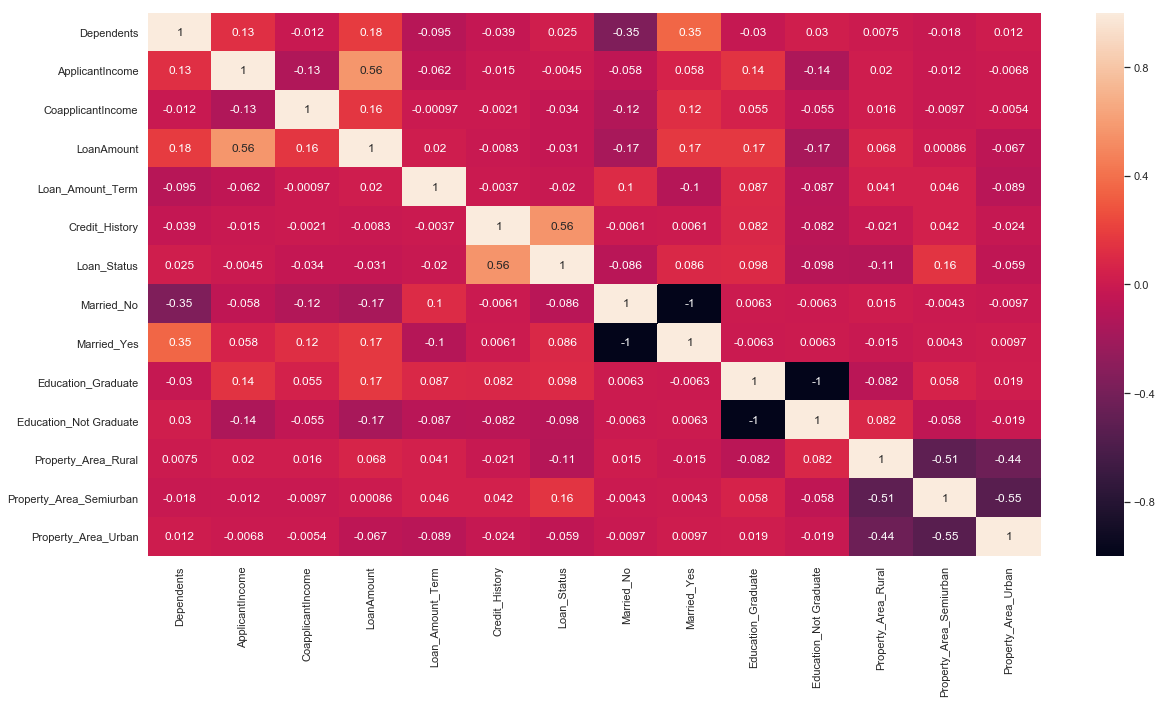

In [16]:
correlation = df_train.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation,annot = True)
plt.show()


In [17]:
df_train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0.070489,0.000000,0.198860,0.74359,1.0,1,1,0,1,0,0,0,1
1,1,0.054830,0.036192,0.172214,0.74359,1.0,0,0,1,1,0,1,0,0
2,0,0.035250,0.000000,0.082489,0.74359,1.0,1,0,1,1,0,0,0,1
3,0,0.030093,0.056592,0.160637,0.74359,1.0,1,0,1,0,1,0,0,1
4,0,0.072356,0.000000,0.191027,0.74359,1.0,1,1,0,1,0,0,0,1


In [18]:
null_columns=df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

Series([], dtype: float64)

# Models

In [366]:
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import *

from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")



#Splitting independent and dependent variables:

X_train, Y_train = df_train.drop(["Loan_Status"], axis=1).values, df_train["Loan_Status"].values
X_test = df_test.values


X_train.shape,Y_train.shape,X_test.shape

((564, 13), (564,), (367, 13))

In [367]:
df_train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0.070489,0.000000,0.198860,0.74359,1.0,1,1,0,1,0,0,0,1
1,1,0.054830,0.036192,0.172214,0.74359,1.0,0,0,1,1,0,1,0,0
2,0,0.035250,0.000000,0.082489,0.74359,1.0,1,0,1,1,0,0,0,1
3,0,0.030093,0.056592,0.160637,0.74359,1.0,1,0,1,0,1,0,0,1
4,0,0.072356,0.000000,0.191027,0.74359,1.0,1,1,0,1,0,0,0,1


# 1. CatBoost Classifier

kfold, scores = KFold(n_splits=3, shuffle=True, random_state=0), list()
for train, test in kfold.split(X_train):
    x_train, x_test = X_train[train], X_train[test]
    y_train, y_test = Y_train[train], Y_train[test]
    
    model = CatBoostClassifier(random_state=27, max_depth=4, task_type="CPU", devices="0:1", n_estimators=1000, verbose=500)
    model.fit(x_train, y_train, cat_features=[0, 2, 6, 8])
    preds = model.predict(x_test)
    score = f1_score(y_test, preds, average="weighted")
    scores.append(score)
    print(score)
print('-'*100)
print("Average accuracy: ", sum(scores)/len(scores))


In [368]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 42)


#clf = CatBoostClassifier(random_state=27, task_type="CPU", devices="0:1", n_estimators=1000, max_depth=1,verbose=500)
#clf.fit(x_train, y_train, cat_features=[0,2,6,8])
#preds = clf.predict(x_test)

#tuned_params ={'iterations': Integer(10, 1000),
#                 'depth': Integer(1, 8),
#                 'learning_rate': Real(0.01, 1.0, 'log-uniform'),
#                 'random_strength': Real(1e-9, 10, 'log-uniform'),
#                 'bagging_temperature': Real(0.0, 1.0),
#                 'border_count': Integer(1, 255),
#                 'l2_leaf_reg': Integer(2, 30),
#                 'scale_pos_weight':Real(0.01, 1.0, 'uniform')}


#params = {'depth':[3,1,2,6,4,5,7,8,9,10],
#          'iterations':[250,100,500,1000],
#          'learning_rate':[0.03,0.05,0.01,0.1,0.2,0.3,1], 
#          'l2_leaf_reg':[3,1,5,10,100],
#          'cat_features' : [[0,2,6,8],[0,2,8]]}


#CatBoostclf = CatBoostClassifier()
#model1 = RandomizedSearchCV(CatBoostclf, params, n_iter=20, cv=5, n_jobs=-1)
#model1.fit(x_train, y_train)


### Tuned Parameters

In [403]:
clf = CatBoostClassifier(learning_rate = 0.005, 
                         max_depth = 10, 
                         l2_leaf_reg= 1,
                         random_state=27, 
                         task_type="CPU", 
                         devices="0:1", 
                         n_estimators=1000,
                         verbose=500)

clf.fit(x_train, y_train)


0:	learn: 0.6897198	total: 489ms	remaining: 8m 8s
500:	learn: 0.3520001	total: 1m 15s	remaining: 1m 15s
999:	learn: 0.2713721	total: 2m 33s	remaining: 0us


In [404]:
pred1 = clf.predict(x_test)
score = f1_score(y_test, pred1, average="weighted")
score1 = accuracy_score(y_test, pred1, normalize=True)
score1

0.8411764705882353

### Plotting feature importance 

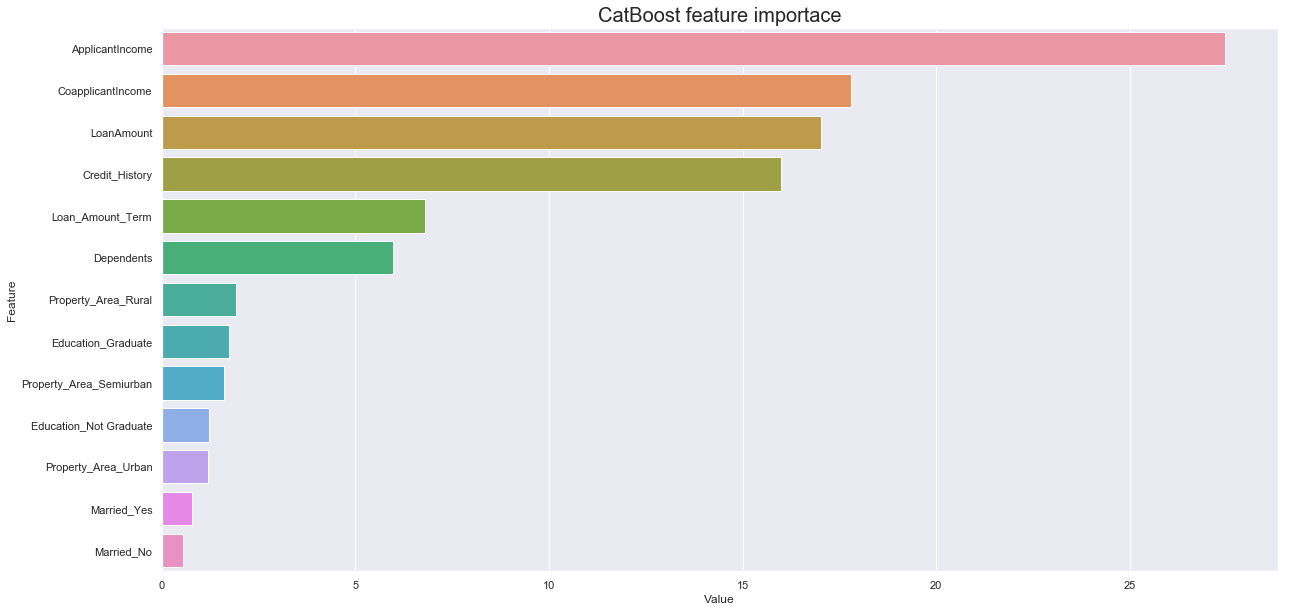

In [373]:
Dataset_plot = df_train.drop(["Loan_Status"],axis = 1)
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,Dataset_plot.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('CatBoost feature importace',size = 20)
#plt.tight_layout()
plt.show()

# 2. XGBoost Classifier

In [20]:
#For XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

X_train, Y_train = df_train.drop(["Loan_Status"], axis=1).values, df_train["Loan_Status"].values
X_test = df_test.values

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 42)

X_train.shape,Y_train.shape,X_test.shape 

((564, 13), (564,), (367, 13))

In [375]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5,8,12,15],
                'learning_rate': [0.01,0.025, 0.05, 0.1,1,10,15], 
                'n_estimators': [5,10,100, 200, 300, 400, 500], 
                'gamma': [0.1, 0.2,0.3,0.4],
                'min_child_weight' : [1,3,5,7,9,12,15,21]}

xgb_classifier = XGBClassifier()
model2 = RandomizedSearchCV(xgb_classifier, tuned_params, n_iter=20, cv=5, n_jobs=-1)
model2.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5, 8, 12, 15], 'learning_rate': [0.01, 0.025, 0.05, 0.1, 1, 10, 15], 'n_estimators': [5, 10, 100, 200, 300, 400, 500], 'gamma': [0.1, 0.2, 0.3, 0.4], 'min_child_weight': [1, 3, 5, 7, 9, 12, 15, 21]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [377]:
best_params = model2.best_estimator_
best_params

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.1,
       learning_rate=0.025, max_delta_step=0, max_depth=12,
       min_child_weight=9, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [379]:
xgb_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.1,
       learning_rate=0.025, max_delta_step=0, max_depth=12,
       min_child_weight=9, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

model1 = xgb_classifier.fit(x_train, y_train)
pred1 = model1.predict(x_test)
score = accuracy_score(y_test, pred1, normalize=True)
score

0.8529411764705882

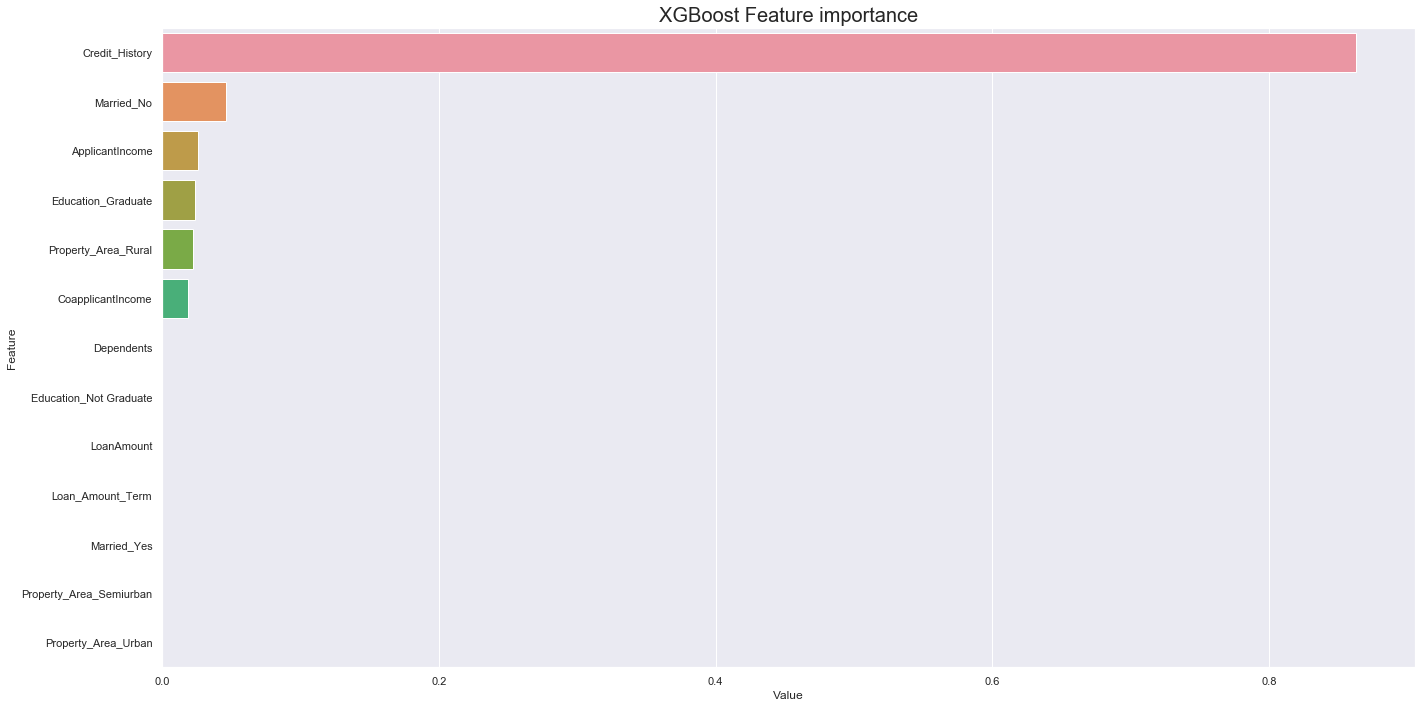

In [380]:
#feat_imp = pd.Series(xgb_classifier.feature_importances_, index=df_train.drop(["Loan_Status"], axis=1).columns)
#feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))
#plt.show() 

Dataset_plot = df_train.drop(["Loan_Status"],axis = 1)
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(xgb_classifier.feature_importances_,Dataset_plot.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGBoost Feature importance',size = 20)
plt.tight_layout()
plt.show()

# 3. Random Forest Classifier

In [381]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5,10,15,20],
                'n_estimators': [5,10,100, 200, 300, 400, 500,1000], 
                'criterion': ['entropy','gini']}

RFclassifier = RandomForestClassifier()
model3 = RandomizedSearchCV(RFclassifier, tuned_params, n_iter=100, cv=5, n_jobs=-1)
model3.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5, 10, 15, 20], 'n_estimators': [5, 10, 100, 200, 300, 400, 500, 1000], 'criterion': ['entropy', 'gini']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [382]:
print(model3.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [383]:
RFclassifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
RFclassifier.fit(x_train, y_train)
pred = RFclassifier.predict(x_test)
score = accuracy_score(y_test, pred, normalize=True)
score

0.8470588235294118

In [384]:
RFclassifier.feature_importances_

array([0.0189775 , 0.06482696, 0.11898292, 0.18809774, 0.06454011,
       0.37921192, 0.03659488, 0.01098679, 0.02658115, 0.01180627,
       0.02764208, 0.02792929, 0.0238224 ])

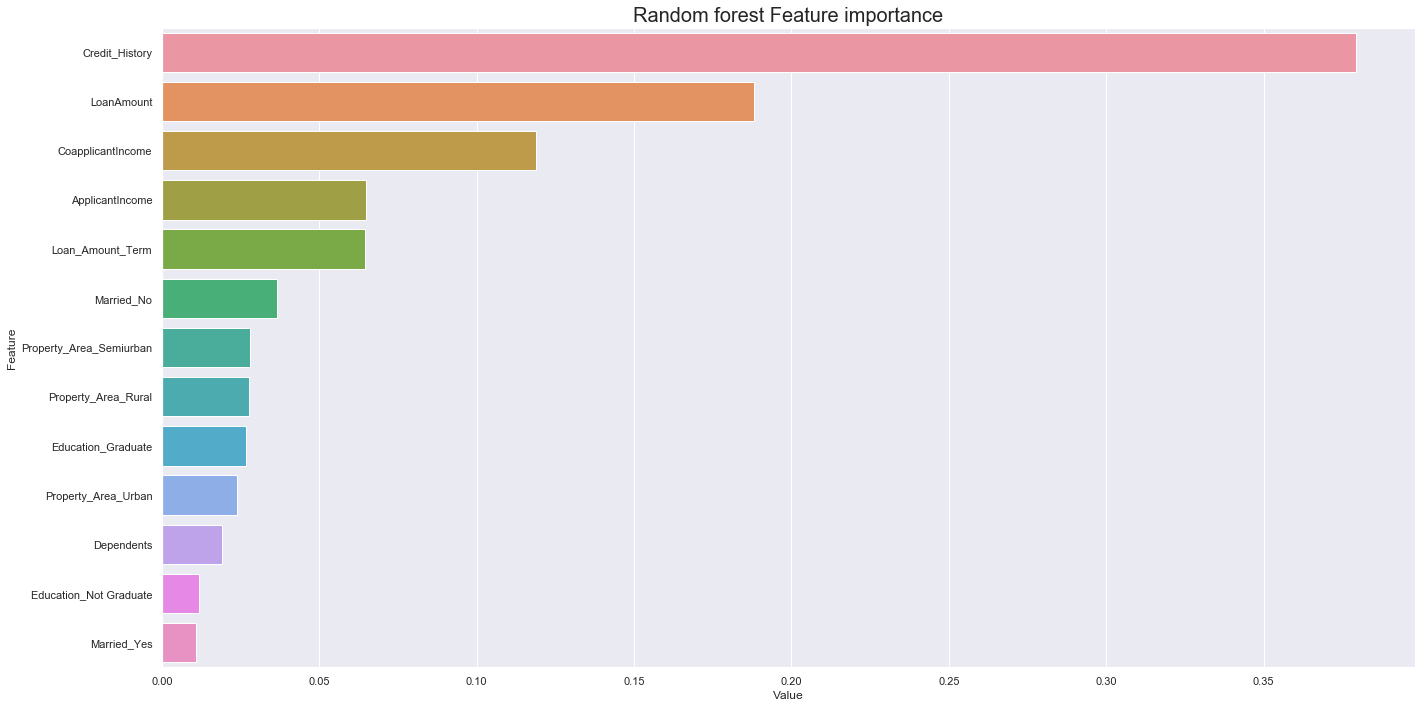

In [385]:
Dataset_plot = df_train.drop(["Loan_Status"],axis = 1)
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(RFclassifier.feature_importances_,Dataset_plot.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Random forest Feature importance',size = 20)
plt.tight_layout()
plt.show()

# 4. Deep learning model 

In [22]:
import tensorflow

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 


#Tuned PARAMETERS
model = Sequential()
model.add(Dense(6, input_dim=13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(x_train,
        y_train,
        batch_size=5,
        epochs=100,
        verbose=0
        )

pred4 = model.predict_classes(x_test)

score = accuracy_score(y_test, pred4, normalize=True)
score


0.8529411764705882

# Final prediction

### XGBoost and Deep learning model have given almost same accuracy. Here XGBoost model is used for final prediction

In [401]:
#Submission for Deep learning model
#Loan_Status = [i[0] for i in model.predict_classes(X_test)]

#Submission for Other models
Loan_Status = model1.predict(X_test)


submission = pd.DataFrame({"Loan_ID": df1['Loan_ID'], "Loan_Status": Loan_Status})
submission['Loan_Status'] = submission['Loan_Status'].map({1:'Y',0:'N'})
submission.head()
#.map({1:'Y',0:'N'})

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# Submission Code

In [402]:
#submission.to_csv('model_name.csv', index=False)